In [1]:
import os
os.environ["TQDM_DISABLE"] = "1"

import tqdm
from tqdm import tqdm as tqdm_class

_original_init = tqdm_class.__init__
def _patched_init(self, *args, **kwargs):
    kwargs["disable"] = True
    _original_init(self, *args, **kwargs)
tqdm_class.__init__ = _patched_init
tqdm.tqdm = tqdm_class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import sys
import time
import logging
logging.getLogger("anomalib").setLevel(logging.ERROR)
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:
    import google.colab
    from google.colab import drive
    !uv pip install anomalib
    !uv pip install open-clip-torch
    drive.mount('/content/drive', force_remount=True)
    PROJECT_ROOT = Path('/content/drive/Othercomputers/Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}")

Current working directory: /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report


### Check config

In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
RUNTIME_CONFIG_ROOT = CONFIG_ROOT / "anomaly.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# output path
OUTPUT_ROOT = PROJECT_ROOT / "output"

# check (선택사항)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Root: {DATA_ROOT}")
print(f"Config Root: {RUNTIME_CONFIG_ROOT}")

Project Root: /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report
Data Root: /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/dataset/MMAD
Config Root: /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/configs/anomaly.yaml


In [4]:
from src.utils import load_config, load_json, load_csv

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# TODO: runtime_config.yaml 확장/수정
config = load_config(RUNTIME_CONFIG_ROOT)
config

{'data': {'root': '/Users/mungughyeon/Documents/Bootcamp/Likelion/backup/datasets/MMAD',
  'output_root': './output',
  'image_size': [256, 256],
  'datasets': ['MVTec-LOCO']},
 'anomaly': {'model': 'efficientad',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': 0},
 'training': {'resume': False,
  'train_batch_size': 8,
  'eval_batch_size': 32,
  'num_workers': 0,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'accelerator': 'cpu',
  'enable_progress_bar': False,
  'logger': 'wandb'},
 'wandb': {'project': 'Anomaly_Detection', 'run_name': 'coreset-0.1'},
 'output': {'save_json': True}}

### Train

In [ ]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.fit_all()

TrainAnomalib - INFO - Initialized - model: efficientad, device: cuda
TrainAnomalib - INFO - Starting fit_all: 5 categories
TrainAnomalib - INFO - [1/5] Training: MVTec-LOCO/breakfast_box...
TrainAnomalib - INFO - Fitting efficientad - MVTec-LOCO/breakfast_box
TrainAnomalib - INFO - Resume is true. Found checkpoint, resuming from: output/EfficientAd/MVTec-LOCO/breakfast_box/v0/model.ckpt


Device: NVIDIA A100-SXM4-40GB

[1/5] Training: MVTec-LOCO/breakfast_box...


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: [wandb.login()] Using explicit session credentials for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: moonstalker9010 (moonstalker9010-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:pytorch_lightning.utilities.rank_zero:You 

wandb: Detected [openai] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/breakfast_box/v0/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type             ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor     │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor    │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator        │      0 │ train │     0 │
│ 3 │ model          │ EfficientAdModel │  8.1 M │ train │     0 │
└───┴────────────────┴──────────────────┴────────┴───────┴───────┘

Trainable params: 8.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.1 M                                                                                                
Total estimated model params size (MB): 32                                                                         
Modules in train mode: 48                                                                                          
Modules in eval mode: 7                                                                                            
Total FLOPs: 0

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/breakfast_box/v0/model.ckpt


[Epoch 11/100] | loss=0.8192
[Epoch 12/100] | loss=0.7834
[Epoch 13/100] | loss=0.7520
[Epoch 14/100] | loss=0.7103
[Epoch 15/100] | loss=0.7197
[Epoch 16/100] | loss=0.6934
[Epoch 17/100] | loss=0.6593
[Epoch 18/100] | loss=0.6916
[Epoch 19/100] | loss=0.6196
[Epoch 20/100] | loss=0.5930
[Epoch 21/100] | loss=0.6223
[Epoch 22/100] | loss=0.6355
[Epoch 23/100] | loss=0.5915
[Epoch 24/100] | loss=0.5571
[Epoch 25/100] | loss=0.5394
[Epoch 26/100] | loss=0.5343
[Epoch 27/100] | loss=0.5331
[Epoch 28/100] | loss=0.5212
[Epoch 29/100] | loss=0.5316
[Epoch 30/100] | loss=0.5000
[Epoch 31/100] | loss=0.4944
[Epoch 32/100] | loss=0.5038
[Epoch 33/100] | loss=0.4763
[Epoch 34/100] | loss=0.4875
[Epoch 35/100] | loss=0.4811
[Epoch 36/100] | loss=0.5044
[Epoch 37/100] | loss=0.4405
[Epoch 38/100] | loss=0.4624
[Epoch 39/100] | loss=0.4284
[Epoch 40/100] | loss=0.4435
[Epoch 41/100] | loss=0.4200
[Epoch 42/100] | loss=0.4390
[Epoch 43/100] | loss=0.4479
[Epoch 44/100] | loss=0.4406
[Epoch 45/100]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇████
train_ae_epoch,█▇▆▅▅▄▄▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁
train_ae_step,█▅▃▃▅▂▄▄▃▆▂▄▃▄▂▃▂▂▃▂▃▂▂▂▂▃▂▂▂▂▂▃▁▂▃▂▃▂▂▁
train_loss_epoch,██▇▇▇▆▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▂▁▁▁▁
train_loss_step,█▅▅▄▃▅▃▃▃▂▃▂▂▃▂▃▃▃▁▂▂▁▁▂▅▂▂▁▂▁▁▁▂▃▂▂▁▂▂▂
train_st_epoch,██▇▆▆▆▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▂▁▁
train_st_step,▇▇▅▅▅▄▄▄▄▅▃▃▃▃▃▂▃▂▂█▁▂▄▅▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
train_stae_epoch,█▇▆▆▆▆▅▅▄▄▄▄▄▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▂▂▁▁
train_stae_step,▁█▃▄▃▅▃▆▃▁▃▄▂▃▂▂▁▁▅▂▂▄▃▂▂▁▃▁▃▂▁▃▂▂▃▄▂▂▁▁
trainer/global_step,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇███
epoch,99


TrainAnomalib - INFO - Fitting MVTec-LOCO/breakfast_box done
TrainAnomalib - INFO - [1/5] MVTec-LOCO/breakfast_box done (5222.8s)
TrainAnomalib - INFO - [2/5] Training: MVTec-LOCO/juice_bottle...
TrainAnomalib - INFO - Fitting efficientad - MVTec-LOCO/juice_bottle
TrainAnomalib - INFO - Resume is true. Found checkpoint, resuming from: output/EfficientAd/MVTec-LOCO/juice_bottle/v0/model.ckpt


✓ [1/5] MVTec-LOCO/breakfast_box done (5222.8s)

[2/5] Training: MVTec-LOCO/juice_bottle...


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: WARNING [wandb.login()] Changing session credentials to explicit value for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/juice_bottle/v0/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type             ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor     │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor    │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator        │      0 │ train │     0 │
│ 3 │ model          │ EfficientAdModel │  8.1 M │ train │     0 │
└───┴────────────────┴──────────────────┴────────┴───────┴───────┘

Trainable params: 8.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.1 M                                                                                                
Total estimated model params size (MB): 32                                                                         
Modules in train mode: 48                                                                                          
Modules in eval mode: 7                                                                                            
Total FLOPs: 0

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/juice_bottle/v0/model.ckpt


[Epoch 11/100] | loss=1.8542
[Epoch 12/100] | loss=1.7606
[Epoch 13/100] | loss=1.6333
[Epoch 14/100] | loss=1.5642
[Epoch 15/100] | loss=1.5541
[Epoch 16/100] | loss=1.4205
[Epoch 17/100] | loss=1.3902
[Epoch 18/100] | loss=1.4434
[Epoch 19/100] | loss=1.2853
[Epoch 20/100] | loss=1.3280
[Epoch 21/100] | loss=1.2001
[Epoch 22/100] | loss=1.1949
[Epoch 23/100] | loss=1.1856
[Epoch 24/100] | loss=1.1754
[Epoch 25/100] | loss=1.0269
[Epoch 26/100] | loss=1.0542
[Epoch 27/100] | loss=1.0600
[Epoch 28/100] | loss=1.0247
[Epoch 29/100] | loss=0.9420
[Epoch 30/100] | loss=0.9311
[Epoch 31/100] | loss=1.0578
[Epoch 32/100] | loss=0.9141
[Epoch 33/100] | loss=0.9525
[Epoch 34/100] | loss=0.8501
[Epoch 35/100] | loss=0.9551
[Epoch 36/100] | loss=0.9007
[Epoch 37/100] | loss=0.8157
[Epoch 38/100] | loss=0.8012
[Epoch 39/100] | loss=0.8353
[Epoch 40/100] | loss=0.7947
[Epoch 41/100] | loss=0.7763
[Epoch 42/100] | loss=0.8008
[Epoch 43/100] | loss=0.7782
[Epoch 44/100] | loss=0.7297
[Epoch 45/100]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train_ae_epoch,█▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁
train_ae_step,▄▇▃▄▄▆▅▇▅▆▃▆▂▃▂▅▄▃▂▃▄█▂▂▃▁▂▂▄▃▁▂▂▂▁▁▁▂▄▁
train_loss_epoch,█▇▇▆▆▅▄▄▄▄▄▄▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▂▁▁▁▁▁▁▁
train_loss_step,▅▅▄█▃▃▃▂▃▃▂▂▂▂█▃▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂▁
train_st_epoch,█▇▆▆▅▄▅▅▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁
train_st_step,▇▆▄▆▅█▃▄▄▃▃▄▃▂▂▂▃▃▃▂▂▂▂▁▂▃▁▁▂▁▁▁▁▁▁▁▂▁▁▁
train_stae_epoch,▇██▇▆▅▆▅▅▄▅▄▄▃▄▄▄▃▄▂▃▂▃▃▂▂▂▂▃▂▃▂▂▂▁▂▂▁▁▁
train_stae_step,▃▂▄▂▃▄▃▂▂▄▃▂▂▂▂▂▂▂▄▂▁▂█▂▁▆▅▂▅▂▁▁▂▂▂▂▃▂▂▃
trainer/global_step,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇█
epoch,99


TrainAnomalib - INFO - Fitting MVTec-LOCO/juice_bottle done
TrainAnomalib - INFO - [2/5] MVTec-LOCO/juice_bottle done (2697.7s)
TrainAnomalib - INFO - [3/5] Training: MVTec-LOCO/pushpins...
TrainAnomalib - INFO - Fitting efficientad - MVTec-LOCO/pushpins
TrainAnomalib - INFO - Resume is true. Found checkpoint, resuming from: output/EfficientAd/MVTec-LOCO/pushpins/v0/model.ckpt
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: WARNING [wandb.login()] Changing session credentials to explicit value for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


✓ [2/5] MVTec-LOCO/juice_bottle done (2697.7s)

[3/5] Training: MVTec-LOCO/pushpins...


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/pushpins/v0/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type             ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor     │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor    │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator        │      0 │ train │     0 │
│ 3 │ model          │ EfficientAdModel │  8.1 M │ train │     0 │
└───┴────────────────┴──────────────────┴────────┴───────┴───────┘

Trainable params: 8.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.1 M                                                                                                
Total estimated model params size (MB): 32                                                                         
Modules in train mode: 48                                                                                          
Modules in eval mode: 7                                                                                            
Total FLOPs: 0

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/pushpins/v0/model.ckpt


[Epoch 11/100] | loss=0.9327
[Epoch 12/100] | loss=0.8801
[Epoch 13/100] | loss=0.8478
[Epoch 14/100] | loss=0.8261
[Epoch 15/100] | loss=0.7907
[Epoch 16/100] | loss=0.7792
[Epoch 17/100] | loss=0.7502
[Epoch 18/100] | loss=0.7311
[Epoch 19/100] | loss=0.7116
[Epoch 20/100] | loss=0.6912
[Epoch 21/100] | loss=0.6742
[Epoch 22/100] | loss=0.6709
[Epoch 23/100] | loss=0.6592
[Epoch 24/100] | loss=0.6409
[Epoch 25/100] | loss=0.6287
[Epoch 26/100] | loss=0.6102
[Epoch 27/100] | loss=0.6052
[Epoch 28/100] | loss=0.5851
[Epoch 29/100] | loss=0.5850
[Epoch 30/100] | loss=0.5788
[Epoch 31/100] | loss=0.5624
[Epoch 32/100] | loss=0.5493
[Epoch 33/100] | loss=0.5478
[Epoch 34/100] | loss=0.5398
[Epoch 35/100] | loss=0.5277
[Epoch 36/100] | loss=0.5237
[Epoch 37/100] | loss=0.5159
[Epoch 38/100] | loss=0.5054
[Epoch 39/100] | loss=0.5070
[Epoch 40/100] | loss=0.4892
[Epoch 41/100] | loss=0.4853
[Epoch 42/100] | loss=0.4802
[Epoch 43/100] | loss=0.4788
[Epoch 44/100] | loss=0.4669
[Epoch 45/100]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▂▂▂▂▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇████████
train_ae_epoch,███▇▇▇▆▆▆▆▅▄▅▄▄▄▃▄▃▃▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁
train_ae_step,█▅▅▆▄▆▄▃▂▆▇█▂▁▇▄▂▅▃▃▁▂▄▃▆▃▄▂▁▁▂▁▂▁▄▂▁▂▂▃
train_loss_epoch,█▇▇▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss_step,█▆▅▄▄▄▄▅▄▅▃▃▃▃▂▂▂▂▂▂▂▂▃▂▁▂▂▂▁▁▂▁▁▁▁▂▂▁▁▂
train_st_epoch,█▇▇▆▅▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
train_st_step,█▇▇▇▆▄▄▃▄▃▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▁▁▁▁▁▁▁▁
train_stae_epoch,▁▁▂▃▃▄▄▅▆▆▆▆▇▇▇▇▇██▇█████▇████████▇█▇██▇
train_stae_step,▂▂▁▁▃▄▄▃▄▁▃▄▄▄▅▃▄▆▃▄▄▄▃▅▅█▆▆▃▃▃▄▅▄▆█▅▂▆█
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇█
epoch,99


TrainAnomalib - INFO - Fitting MVTec-LOCO/pushpins done
TrainAnomalib - INFO - [3/5] MVTec-LOCO/pushpins done (3179.9s)
TrainAnomalib - INFO - [4/5] Training: MVTec-LOCO/screw_bag...
TrainAnomalib - INFO - Fitting efficientad - MVTec-LOCO/screw_bag


✓ [3/5] MVTec-LOCO/pushpins done (3179.9s)

[4/5] Training: MVTec-LOCO/screw_bag...


TrainAnomalib - INFO - Resume is true. Found checkpoint, resuming from: output/EfficientAd/MVTec-LOCO/screw_bag/v0/model.ckpt
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: WARNING [wandb.login()] Changing session credentials to explicit value for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/screw_bag/v0/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type             ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor     │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor    │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator        │      0 │ train │     0 │
│ 3 │ model          │ EfficientAdModel │  8.1 M │ train │     0 │
└───┴────────────────┴──────────────────┴────────┴───────┴───────┘

Trainable params: 8.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.1 M                                                                                                
Total estimated model params size (MB): 32                                                                         
Modules in train mode: 48                                                                                          
Modules in eval mode: 7                                                                                            
Total FLOPs: 0

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/screw_bag/v0/model.ckpt


[Epoch 11/100] | loss=12.9122
[Epoch 12/100] | loss=12.2938
[Epoch 13/100] | loss=11.7699
[Epoch 14/100] | loss=11.3429
[Epoch 15/100] | loss=10.9615
[Epoch 16/100] | loss=10.5626
[Epoch 17/100] | loss=10.2494
[Epoch 18/100] | loss=9.9811
[Epoch 19/100] | loss=9.6535
[Epoch 20/100] | loss=9.4249
[Epoch 21/100] | loss=9.1453
[Epoch 22/100] | loss=8.9424
[Epoch 23/100] | loss=8.7622
[Epoch 24/100] | loss=8.5734
[Epoch 25/100] | loss=8.4044
[Epoch 26/100] | loss=8.2287
[Epoch 27/100] | loss=8.0454
[Epoch 28/100] | loss=7.9245
[Epoch 29/100] | loss=7.7539
[Epoch 30/100] | loss=7.6409
[Epoch 31/100] | loss=7.4710
[Epoch 32/100] | loss=7.3752
[Epoch 33/100] | loss=7.2514
[Epoch 34/100] | loss=7.1537
[Epoch 35/100] | loss=7.0696
[Epoch 36/100] | loss=6.9667
[Epoch 37/100] | loss=6.8662
[Epoch 38/100] | loss=6.7612
[Epoch 39/100] | loss=6.6765
[Epoch 40/100] | loss=6.5820
[Epoch 41/100] | loss=6.5117
[Epoch 42/100] | loss=6.4594
[Epoch 43/100] | loss=6.3619
[Epoch 44/100] | loss=6.3137
[Epoch 

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
train_ae_epoch,██▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
train_ae_step,██▅▆▅▅▇▄▅█▅▅▄▆▇▇▃▇▅▄▇▆▄▄▄▅▆▃▅▄▃▄▃▂▅▄▄▃▁▄
train_loss_epoch,██▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
train_loss_step,██▇▅▅▄▅▄▄▃▃▃▃▃▄▃▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▂
train_st_epoch,██▇▇▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_st_step,█▆▆▅▆▃▃▄▄▄▃▄▃▃▂▂▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁
train_stae_epoch,▂▁▁▂▁▂▂▂▂▁▂▂▁▃▃▅▄▄▄▅▅▅▅▅▆▆▆▇▆▇▆▇▇▇▆▇█▇▇█
train_stae_step,▄▄▃▂▃▃▂▄▃▂▃▆▃▄▃▂▂▅▅▇▃▃▅▁▆▂█▄▃▃▂▆▅▃▅▅▇▆▄▃
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇█████
epoch,99


TrainAnomalib - INFO - Fitting MVTec-LOCO/screw_bag done
TrainAnomalib - INFO - [4/5] MVTec-LOCO/screw_bag done (3384.8s)
TrainAnomalib - INFO - [5/5] Training: MVTec-LOCO/splicing_connectors...
TrainAnomalib - INFO - Fitting efficientad - MVTec-LOCO/splicing_connectors
TrainAnomalib - INFO - Resume is true. Found checkpoint, resuming from: output/EfficientAd/MVTec-LOCO/splicing_connectors/v0/model.ckpt


✓ [4/5] MVTec-LOCO/screw_bag done (3384.8s)

[5/5] Training: MVTec-LOCO/splicing_connectors...


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: WARNING [wandb.login()] Changing session credentials to explicit value for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/splicing_connectors/v0/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type             ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor     │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor    │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator        │      0 │ train │     0 │
│ 3 │ model          │ EfficientAdModel │  8.1 M │ train │     0 │
└───┴────────────────┴──────────────────┴────────┴───────┴───────┘

Trainable params: 8.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.1 M                                                                                                
Total estimated model params size (MB): 32                                                                         
Modules in train mode: 48                                                                                          
Modules in eval mode: 7                                                                                            
Total FLOPs: 0

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/Othercomputers/Mac/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/splicing_connectors/v0/model.ckpt


[Epoch 11/100] | loss=0.8980
[Epoch 12/100] | loss=0.8334
[Epoch 13/100] | loss=0.8442
[Epoch 14/100] | loss=0.7752
[Epoch 15/100] | loss=0.7530
[Epoch 16/100] | loss=0.7161
[Epoch 17/100] | loss=0.6894
[Epoch 18/100] | loss=0.7105
[Epoch 19/100] | loss=0.6494
[Epoch 20/100] | loss=0.6648
[Epoch 21/100] | loss=0.6269
[Epoch 22/100] | loss=0.6126
[Epoch 23/100] | loss=0.6108
[Epoch 24/100] | loss=0.6234
[Epoch 25/100] | loss=0.5866
[Epoch 26/100] | loss=0.5599
[Epoch 27/100] | loss=0.5903
[Epoch 28/100] | loss=0.5464
[Epoch 29/100] | loss=0.5627
[Epoch 30/100] | loss=0.5431
[Epoch 31/100] | loss=0.5621
[Epoch 32/100] | loss=0.5282
[Epoch 33/100] | loss=0.5226
[Epoch 34/100] | loss=0.4910
[Epoch 35/100] | loss=0.4962
[Epoch 36/100] | loss=0.4953
[Epoch 37/100] | loss=0.4779
[Epoch 38/100] | loss=0.4772
[Epoch 39/100] | loss=0.4952
[Epoch 40/100] | loss=0.4829
[Epoch 41/100] | loss=0.4914
[Epoch 42/100] | loss=0.4584
[Epoch 43/100] | loss=0.4548
[Epoch 44/100] | loss=0.4491
[Epoch 45/100]

### Predict

In [5]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
[attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]

Device: mps
[efficientad] device: mps, accelerator: cpu

[1/5] Predicting: MVTec-LOCO/breakfast_box...
✓ [1/5] MVTec-LOCO/breakfast_box done (64.1s)

[2/5] Predicting: MVTec-LOCO/juice_bottle...
✓ [2/5] MVTec-LOCO/juice_bottle done (64.3s)

[3/5] Predicting: MVTec-LOCO/pushpins...
✓ [3/5] MVTec-LOCO/pushpins done (62.2s)

[4/5] Predicting: MVTec-LOCO/screw_bag...
✓ [4/5] MVTec-LOCO/screw_bag done (73.2s)

[5/5] Predicting: MVTec-LOCO/splicing_connectors...
✓ [5/5] MVTec-LOCO/splicing_connectors done (62.2s)


['anomaly_map',
 'batch_size',
 'collate',
 'explanation',
 'gt_label',
 'gt_mask',
 'image',
 'image_path',
 'item_class',
 'items',
 'keys',
 'mask_path',
 'numpy_class',
 'pred_label',
 'pred_mask',
 'pred_score',
 'to_numpy',
 'update',
 'validate_anomaly_map',
 'validate_explanation',
 'validate_gt_label',
 'validate_gt_mask',
 'validate_image',
 'validate_image_path',
 'validate_mask_path',
 'validate_pred_label',
 'validate_pred_mask',
 'validate_pred_score']

In [6]:
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score
)
from scipy.ndimage import label as connected_components


def compute_pro(gt_masks_np, anomaly_maps_np, num_thresholds=50):
    """Per-Region Overlap (PRO) 계산.
    
    각 GT connected component별로 overlap을 계산하고, 
    FPR에 대해 적분하여 정규화한 값을 반환.
    """
    # threshold 범위 설정
    thresholds = np.linspace(anomaly_maps_np.max(), anomaly_maps_np.min(), num_thresholds)
    
    pro_values = []
    fpr_values = []
    
    for thresh in thresholds:
        pred_binary = (anomaly_maps_np >= thresh).astype(int)
        
        # FPR 계산 (전체 정상 픽셀 중 잘못 예측한 비율)
        gt_neg = (gt_masks_np == 0)
        fp = np.sum(pred_binary[gt_neg])
        fpr = fp / max(np.sum(gt_neg), 1)
        
        # Per-Region Overlap 계산
        region_overlaps = []
        for i in range(len(gt_masks_np)):
            labeled, num_regions = connected_components(gt_masks_np[i])
            for region_id in range(1, num_regions + 1):
                region_mask = (labeled == region_id)
                region_size = np.sum(region_mask)
                if region_size == 0:
                    continue
                overlap = np.sum(pred_binary[i][region_mask]) / region_size
                region_overlaps.append(overlap)
        
        if region_overlaps:
            pro_values.append(np.mean(region_overlaps))
            fpr_values.append(fpr)
    
    if len(pro_values) < 2:
        return 0.0
    
    # FPR 0.3 이하 구간만 사용 (논문 기준)
    fpr_limit = 0.3
    filtered = [(f, p) for f, p in zip(fpr_values, pro_values) if f <= fpr_limit]
    if len(filtered) < 2:
        return 0.0
    
    fpr_filtered, pro_filtered = zip(*sorted(filtered))
    pro_auc = np.trapz(pro_filtered, fpr_filtered) / fpr_limit
    return pro_auc


results = []
for category, batches in predictions.items():                                                        
    y_true = np.concatenate([b.gt_label.cpu().numpy() for b in batches])
    y_score = np.concatenate([b.pred_score.cpu().numpy() for b in batches])                          
    y_pred = (y_score >= 0.5).astype(int)                                   

    metrics = {
        "Category": category,
        "Image_AUROC": round(roc_auc_score(y_true, y_score), 4),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 4),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_true, y_pred, zero_division=0), 4),
        "N_samples": len(y_true)
    }

    # Pixel-level
    if batches[0].gt_mask is not None:
        gt_masks = torch.cat([b.gt_mask for b in batches])
        anomaly_maps = torch.cat([b.anomaly_map for b in batches])
        
        gt_masks_np = gt_masks.cpu().numpy().astype(int)
        anomaly_maps_np = anomaly_maps.cpu().numpy().astype(float)
        
        # Pixel AUROC
        gt_flat = gt_masks_np.flatten()
        pred_flat = anomaly_maps_np.flatten()
        if len(np.unique(gt_flat)) > 1:
            metrics["Pixel_AUROC"] = round(roc_auc_score(gt_flat, pred_flat), 4)
        else:
            metrics["Pixel_AUROC"] = float("nan")
        
        # PRO
        metrics["PRO"] = round(compute_pro(
            gt_masks_np.squeeze(1) if gt_masks_np.ndim == 4 else gt_masks_np,
            anomaly_maps_np.squeeze(1) if anomaly_maps_np.ndim == 4 else anomaly_maps_np
        ), 4)
        
        # Dice / IoU
        pred_binary = (anomaly_maps > 0.5).int()
        metrics["Dice"] = round(
            f1_score(gt_masks.flatten().cpu().numpy().astype(int), 
            pred_binary.flatten().cpu().numpy(), zero_division=0), 4
        )
        metrics["IoU"] = round(
            jaccard_score(gt_masks.flatten().cpu().numpy().astype(int), 
            pred_binary.flatten().cpu().numpy(), average="binary", zero_division=0), 4
        )

    results.append(metrics)

metrics_df = pd.DataFrame(results).set_index("Category")
avg_row = metrics_df.drop(columns=["N_samples"]).mean().round(4)
avg_row["N_samples"] = metrics_df["N_samples"].sum()
metrics_df.loc["Average"] = avg_row
col_order = [c for c in metrics_df.columns if c != "N_samples"] + ["N_samples"]
metrics_df = metrics_df[col_order]

metrics_df

,Image_AUROC,Precision,Recall,F1,Pixel_AUROC,PRO,Dice,IoU,N_samples
Category,,,,,,,,,
MVTec-LOCO/breakfast_box,0.7554,0.6667,0.9249,0.7748,0.8416,0.0612,0.4947,0.3286,275.0
MVTec-LOCO/juice_bottle,0.9678,0.9864,0.9195,0.9518,0.8542,0.0570,0.6071,0.4359,330.0
MVTec-LOCO/pushpins,0.8319,0.8662,0.7151,0.7834,0.6678,0.0111,0.0761,0.0396,310.0
MVTec-LOCO/screw_bag,0.6692,0.6422,1.0000,0.7821,0.6368,0.5978,0.1010,0.0532,341.0
MVTec-LOCO/splicing_connectors,0.8529,0.8154,0.8238,0.8196,0.6179,0.0005,0.2366,0.1342,312.0
Average,0.8154,0.7954,0.8767,0.8223,0.7237,0.1455,0.3031,0.1983,1568.0


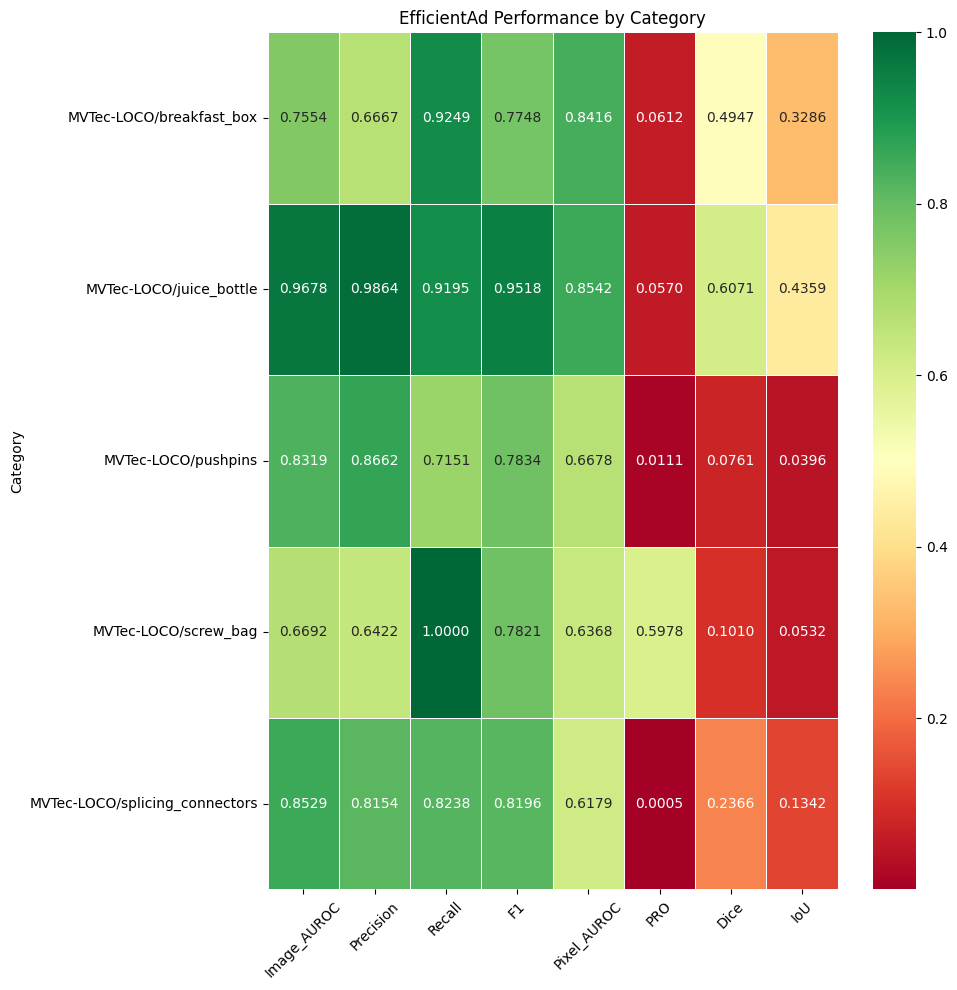

<Axes: title={'center': 'EfficientAd Performance by Category'}, ylabel='Category'>

In [7]:
from src.visual.plot import heatmap_plot

metrics_trans = metrics_df.drop('Average').drop(columns='N_samples')
heatmap_plot(
    metrics_trans,
    figsize=(10, 10),
    cmap='RdYlGn',
    annot=True,
    fmt='.4f',
    linewidths=0.5,
    title='EfficientAd Performance by Category',
    rotation_x=45,
    rotation_y=0
)

Device: mps
[efficientad] device: mps, accelerator: cpu
Categories: 5 | Filter: anomaly | Samples: 1

MVTec-LOCO / breakfast_box
  anomaly: 173 images → Selected: 1
  Inference: 74.0ms/image


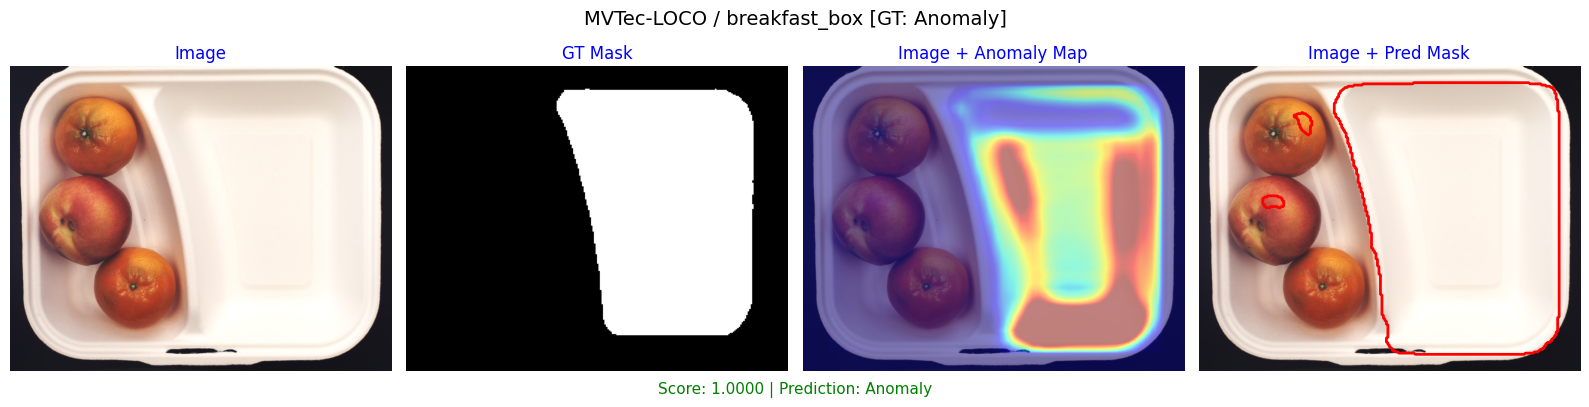


MVTec-LOCO / juice_bottle
  anomaly: 236 images → Selected: 1
  Inference: 49.6ms/image


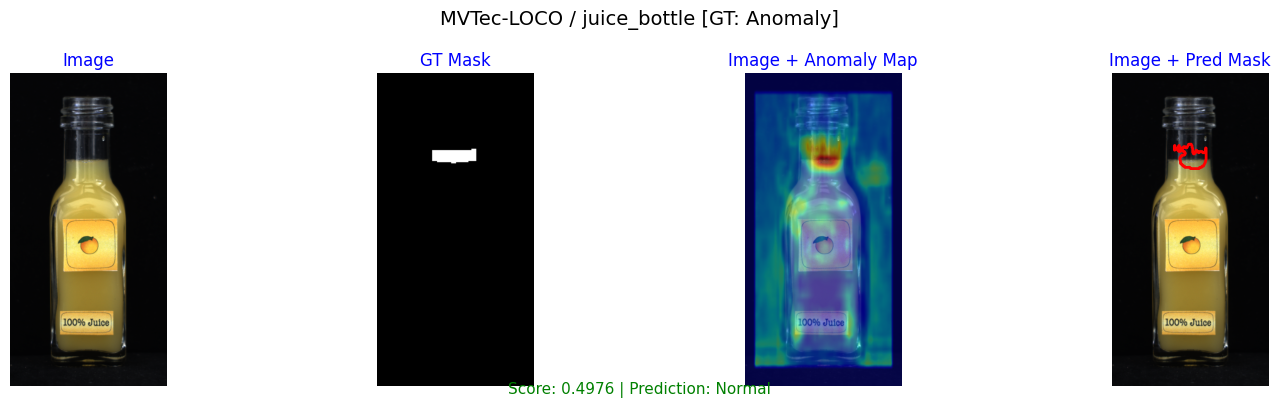


MVTec-LOCO / pushpins
  anomaly: 172 images → Selected: 1
  Inference: 50.7ms/image


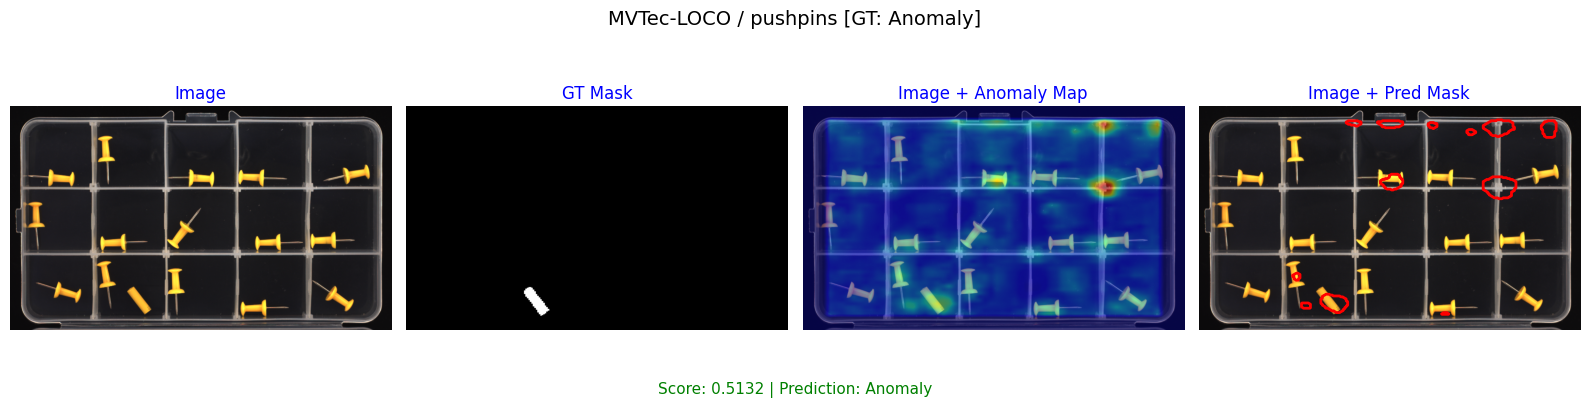


MVTec-LOCO / screw_bag
  anomaly: 219 images → Selected: 1
  Inference: 50.5ms/image


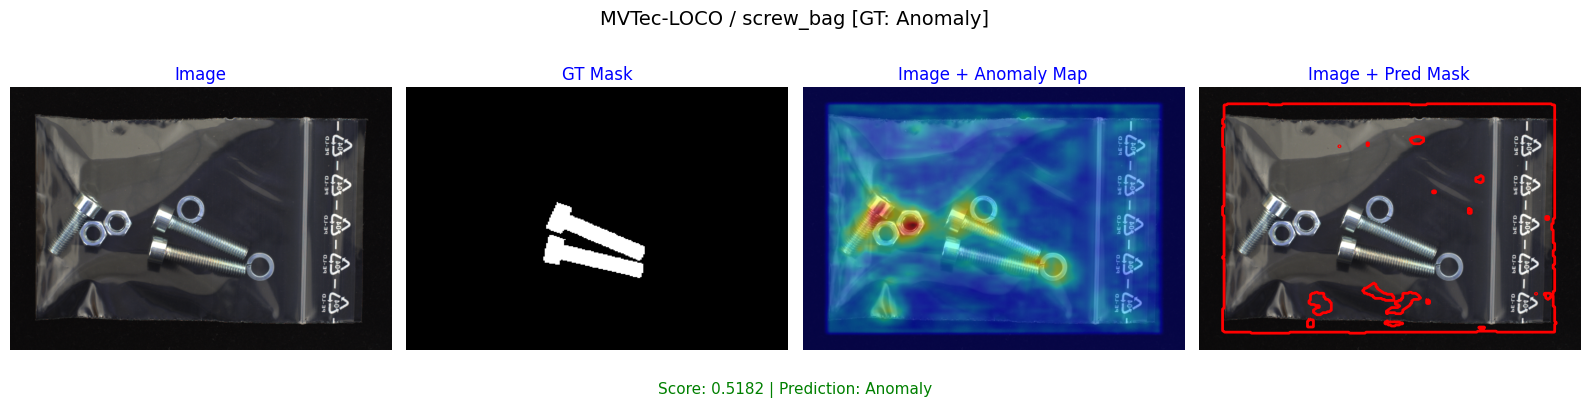


MVTec-LOCO / splicing_connectors
  anomaly: 193 images → Selected: 1
  Inference: 55.2ms/image


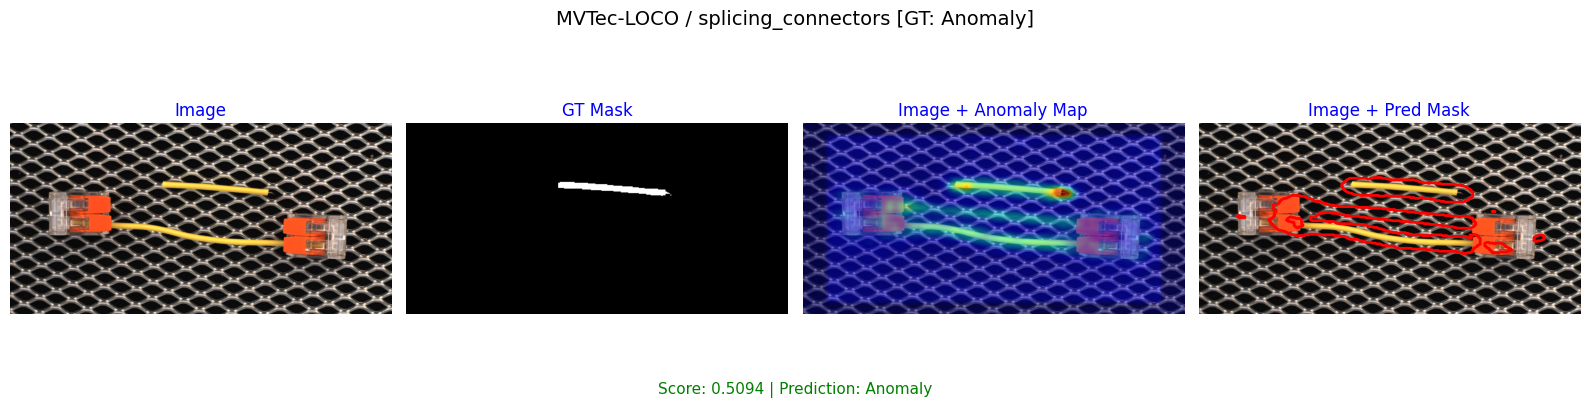

In [9]:
from scripts.train_anomalib import Anomalibs
from src.visual.plot import visualize_predictions_from_runner

runner = Anomalibs()
results = visualize_predictions_from_runner(
    runner,
    n_samples_per_category=1,
    filter_by="anomaly",      # "all", "anomaly", "normal"
    random_sample=True,       # 랜덤 샘플링
    show_inference_time=True,
)